In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, sys

(447, 297, 3)


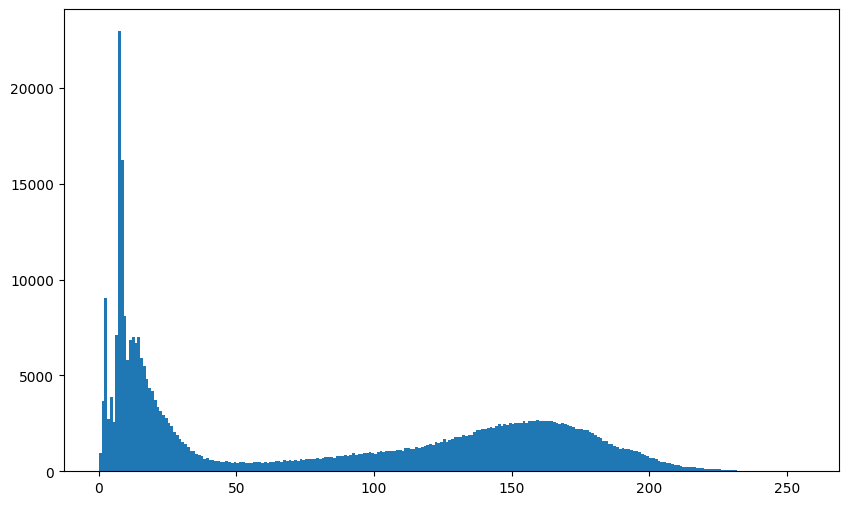

In [ ]:
file = cv2.imread("/content/drive/MyDrive/SteganoData/TrainData/plainData/dog.4003.jpg")
print(file.shape)
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(file[:,:,:].ravel(), bins=256, range=(0, 256))
counts = counts.astype(int)


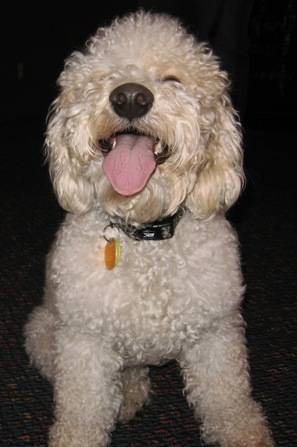

In [ ]:
cv2_imshow(file)

(447, 297, 3)


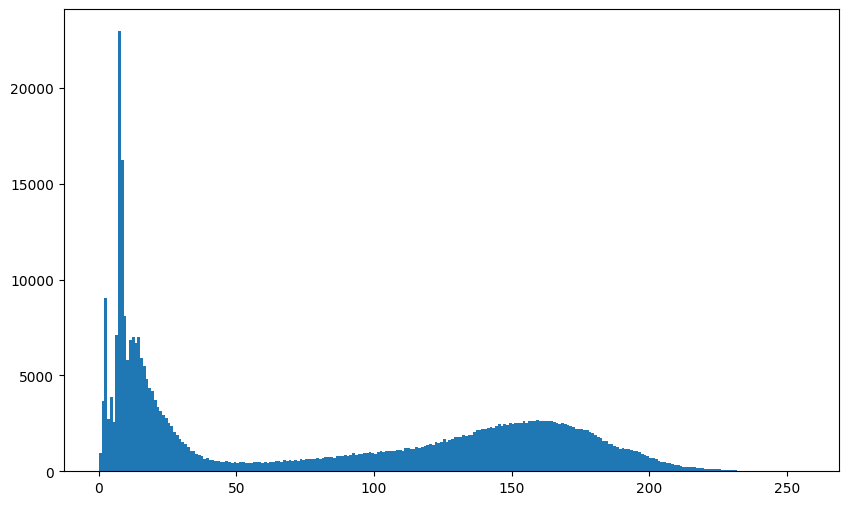

In [ ]:
file2 = cv2.imread("/content/drive/MyDrive/SteganoData/TrainData/stegoData/10.jpg", cv2.COLOR_BGR2RGB)
print(file2.shape)

plt.figure(figsize=(10, 6))
counts2, bins2, patches2 = plt.hist(file2[:,:,:].ravel(), bins=256, range=(0, 256))
counts2 = counts2.astype(int)

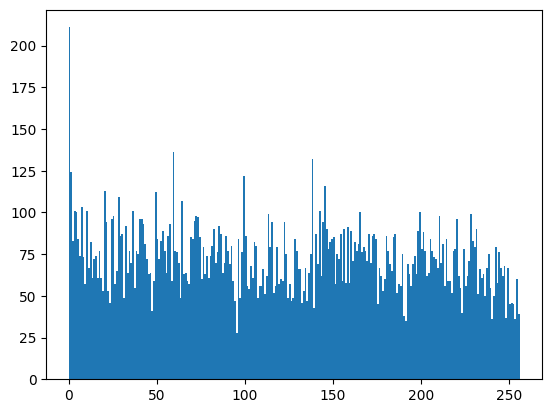

In [ ]:
hex = None
with open("/content/drive/MyDrive/SteganoData/TrainData/plainData/dog.4003.jpg", "rb") as f:
  hex = f.read()

arrayHex = np.array(list(hex))

Hexcount, Hexlen, Hexpatches = plt.hist(arrayHex[:], bins=256, range=(0, 256))

Hexcount = Hexcount.astype(int)

[10263.  1422.  1249.   927.  1245.  1197.   987.   931.  1054.  1149.
  1219.  1207.  1149.   962.  1017.   999.  1189.  1150.  1251.   996.
  1199.  1261.  1378.  1098.  1209.  1083.   992.   985.  1088.   965.
  1039.   990.  1508.  1086.  1250.   955.  1255.  1261.  1048.  1114.
  1032.  1097.  1311.  1160.  1161.  1656.  1112.  1097.  1270.  1072.
  1263.  1045.  1074.   983.  1016.   926.  1080.  1021.  1042.  1079.
  1262.   992.  1221.  1033.  1142.  1037.  1156.  1042.  1235.  1285.
  1107.   952.  1239.  1172.  1169.  1271.  1081.   931.  1062.  1064.
  1071.  1183.  1164.   935.  1232.  1210.  1318.  1179.  1225.  1077.
  1362.  1664.  1120.  1255.  1205.   917.  1157.  1099.  1220.  1079.
  1127.  1073.  1066.  1006.  1164.  1169.  1092.  1007.  1153.  1008.
  1439.  1234.  1170.  1164.  1237.  1047.  1354.  1125.  1023.  1024.
  1196.  1041.  1234.  1029.  1178.   904.  1143.   915.  1094.  1044.
  1125.   958.  1155.  1110.  1112.  1120.  1231.  1169.  1254.  1235.
  1191

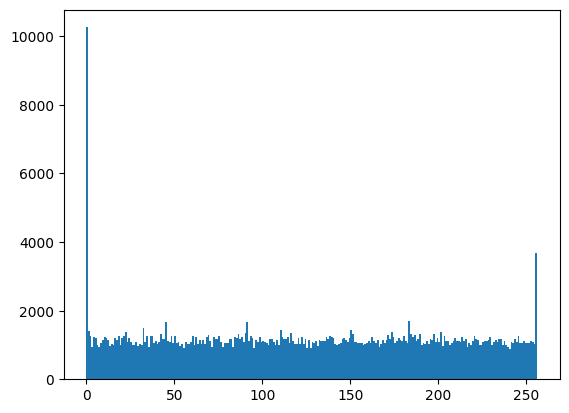

In [ ]:
hex2 = None
with open("/content/drive/MyDrive/SteganoData/TrainData/stegoData/10.jpg", "rb") as f:
  hex2 = f.read()

arrayHex2 = np.array(list(hex2))

Hexcount2, Hexlen2, Hexpatches2 = plt.hist(arrayHex2[:], bins=256, range=(0, 256))

Hexcount2 = Hexcount2
print(Hexcount2)

In [ ]:
plain = Hexcount - counts
stego = Hexcount2 - counts2

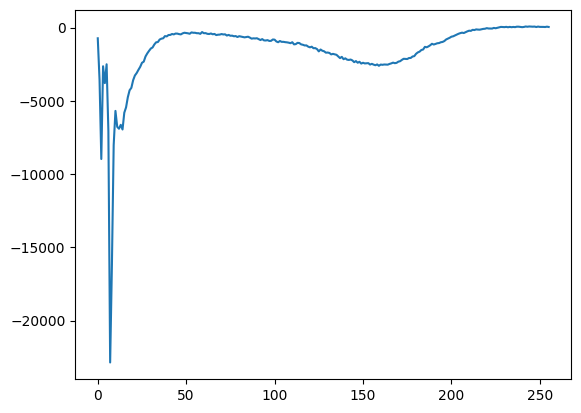

In [ ]:
x = np.arange(0,256)
y = plain
plt.plot(x,y)
plt.show()

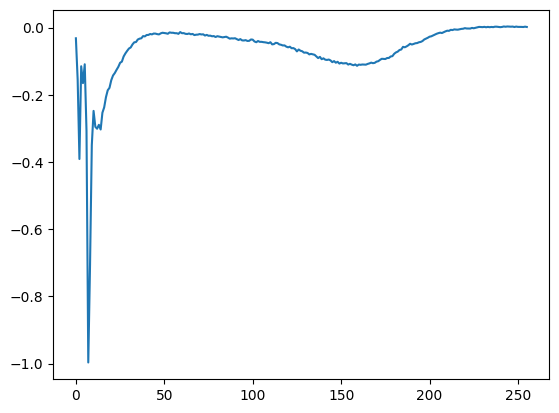

In [ ]:
ran = max(plain) - min(plain)
y = plain / ran
plt.plot(x,y)
plt.show()

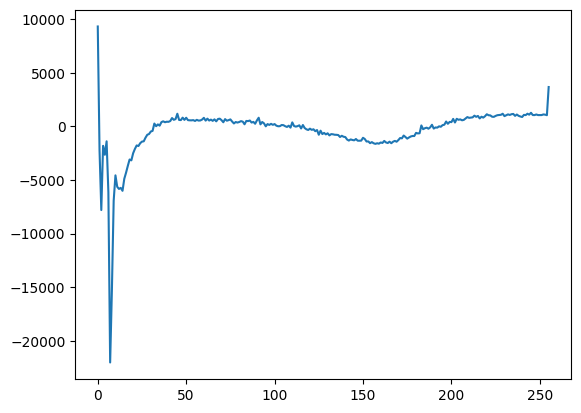

In [ ]:
x = np.arange(0,256)
y = stego
plt.plot(x,y)
plt.show()

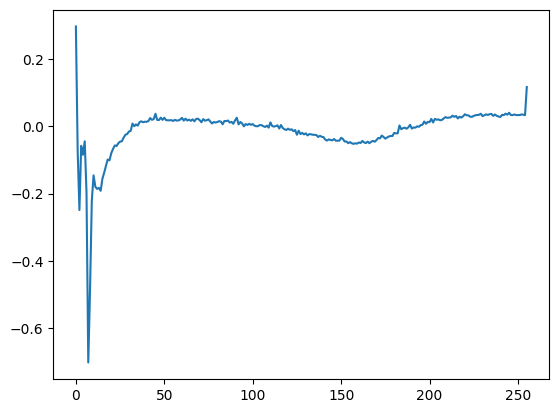

In [ ]:
ran = max(stego) - min(stego)
y = stego / ran
plt.plot(x,y)
plt.show()

In [ ]:
print(stego == plain)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, sys
from keras.callbacks import EarlyStopping

In [2]:
# 여기서 부터 인공지능 관련 코드

def RangeNormalize(data): # 1 ~ -1사이의 값으로 정규화 함수
  dataRange = max(data) - min(data)
  return data / dataRange

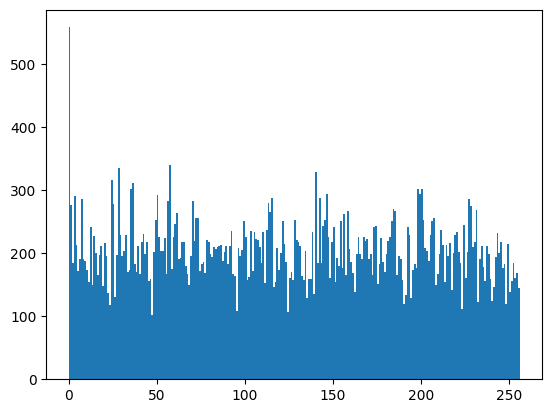

In [6]:
image = cv2.imread("./StegoData_bmp/Train/plain/101.bmp")
total = len(image.ravel()) # rgb값에 대한 총 길이 즉, 높이 * 너비 * 3(rgb)

with open("./StegoData_bmp/Train/stego/file0.bmp", 'rb') as f:
    hdata = list(f.read())
    finalData = hdata[:54] + hdata[54 + total:] # rgb값만 제외한 부분
    counts, length, patches = plt.hist(finalData, bins=256, range=(0, 256))

In [8]:
'''
데이터 비율

Case1
총 데이터 수 : 1000개
학습 데이터 : 800개
검증 데이터 : 200개

스테고 : 60%
정상 : 40%

학습 데이터 : 480(스테고 데이터) + 320(정상 데이터)
검증 데이터 : 120(스테고 데이터) + 80(정상 데이터)

총 수량
그냥 사진 400개
스테고 사진 : 600개
----------------------------------------------------------------
Case2
100 : 30 = 2000 : x

20 * 30 = 600

600, 1400

train : 1400
 stego : 700 -> 5(파일) : 3(글자) : 2(글자 + 파일) = 350 : 210 : 140
 plain : 700


validation : 600
 stego : 300 -> 5(파일) : 3(글자) : 2(글자 + 파일) = 150 : 90 : 60
 plain : 300
----------------------------------------------------------------
Case3
4000개 데이터 사용

train 2800

plain 1400

stego 1400 -> 700 : 420 : 280


validation 1200

plain 600

stego 600 -> 300 : 180 : 120



'''
def ReadyInputData(dirpath): # 입력 데이터 만드는 함수
  X = []
  files = os.listdir(dirpath)
  if ".ipynb_checkpoints" in files:
    files.remove(".ipynb_checkpoints")
  for i in files:

    image = cv2.imread(dirpath+i)
    total = len(image.ravel()) # rgb값에 대한 총 길이 즉, 높이 * 너비 * 3(rgb)

    with open(dirpath+i, 'rb') as f:
      hdata = list(f.read())
      finalData = hdata[:54] + hdata[54 + total:] # rgb값만 제외한 부분
      counts, length, patches = plt.hist(finalData, bins=256, range=(0, 256)) # 히스토그램 값 추출
      plt.close()
      counts = counts.astype(np.int32)
      X.append(RangeNormalize(counts)) # Hex히스토그램 - RGB 히스토그램 정규화
      print(f"File {i} is Well Done!")

  return np.array(X)

In [9]:
TrainPlainX = ReadyInputData("./StegoData_bmp/Train/plain/")
TrainStegoX = ReadyInputData("./StegoData_bmp/Train/stego/")
TrainX = np.concatenate([TrainPlainX, TrainStegoX])
TrainY = np.concatenate([np.zeros(TrainPlainX.shape[0]), np.ones(TrainStegoX.shape[0])]) # 0 = 스테가노 적용 X, 1 = 스테가노 적용 O

print(TrainX.shape)
print(TrainY.shape)

File 101.bmp is Well Done!
File 102.bmp is Well Done!
File 103.bmp is Well Done!
File 104.bmp is Well Done!
File 105.bmp is Well Done!
File 106.bmp is Well Done!
File 107.bmp is Well Done!
File 108.bmp is Well Done!
File 109.bmp is Well Done!
File 110.bmp is Well Done!
File 111.bmp is Well Done!
File 112.bmp is Well Done!
File 113.bmp is Well Done!
File 114.bmp is Well Done!
File 115.bmp is Well Done!
File 1693.bmp is Well Done!
File 1694.bmp is Well Done!
File 1697.bmp is Well Done!
File 1698.bmp is Well Done!
File 1703.bmp is Well Done!
File 1704.bmp is Well Done!
File 1705.bmp is Well Done!
File 1707.bmp is Well Done!
File 1709.bmp is Well Done!
File 1710.bmp is Well Done!
File 1711.bmp is Well Done!
File 1714.bmp is Well Done!
File 1715.bmp is Well Done!
File 1716.bmp is Well Done!
File 1719.bmp is Well Done!
File 1722.bmp is Well Done!
File 1723.bmp is Well Done!
File 1724.bmp is Well Done!
File 1726.bmp is Well Done!
File 1727.bmp is Well Done!
File 1729.bmp is Well Done!
File 17

In [16]:
ValPlainX = ReadyInputData("./StegoData_bmp/Validation/plain/")
ValStegoX = ReadyInputData("./StegoData_bmp/Validation/stego/")
ValX = np.concatenate([ValPlainX, ValStegoX])
ValY = np.concatenate([np.zeros(ValPlainX.shape[0]), np.ones(ValStegoX.shape[0])]) # 0 = 스테가노 적용 X, 1 = 스테가노 적용 O
print(ValX.shape)
print(ValY.shape)

File bart100.bmp is Well Done!
File bart101.bmp is Well Done!
File bart102.bmp is Well Done!
File bart103.bmp is Well Done!
File bart104.bmp is Well Done!
File bart105.bmp is Well Done!
File bart106.bmp is Well Done!
File bart108.bmp is Well Done!
File bart109.bmp is Well Done!
File bart110.bmp is Well Done!
File bart111.bmp is Well Done!
File bart112.bmp is Well Done!
File bart113.bmp is Well Done!
File bart114.bmp is Well Done!
File bart115.bmp is Well Done!
File bart116.bmp is Well Done!
File bart117.bmp is Well Done!
File bart118.bmp is Well Done!
File bart119.bmp is Well Done!
File bart120.bmp is Well Done!
File bart121.bmp is Well Done!
File bart122.bmp is Well Done!
File bart123.bmp is Well Done!
File bart124.bmp is Well Done!
File bart125.bmp is Well Done!
File bart126.bmp is Well Done!
File bart127.bmp is Well Done!
File bart128.bmp is Well Done!
File bart130.bmp is Well Done!
File bart131.bmp is Well Done!
File bart132.bmp is Well Done!
File bart133.bmp is Well Done!
File bar

In [21]:
'''l2_reg = tf.keras.regularizers.l2(0.01) # 가중치 규제 2

X = tf.keras.layers.Input(shape=[256])
H = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=l2_reg)(X)
H = tf.keras.layers.Dropout(0.1)(H)
H = tf.keras.layers.Dense(256, activation='elu')(H)
H = tf.keras.layers.Dense(64, activation='elu')(H)
Y = tf.keras.layers.Dense(1, activation="sigmoid")(H)
model = tf.keras.models.Model(X, Y)
AdamWOp = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.1) # weight_decay는 가중치의 크기가 변화되는 정도를 규제하는 수치 (수치가 커질수록 가중치의 변화될 수 있는 범위가 좁아짐)

model.compile(loss="binary_crossentropy", optimizer=AdamWOp, metrics=["accuracy"])
'''

# 그나마 성공적인 모델 loss: 0.4190 - accuracy: 0.8236 - val_loss: 0.6301 - val_accuracy: 0.7100
l2_reg = tf.keras.regularizers.l2(0.04)
# l1_reg = tf.keras.regularizers.l1(0.03)

X = tf.keras.layers.Input(shape=[256])
H = tf.keras.layers.Dense(129, activation='relu')(X)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.BatchNormalization()
H = tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=l2_reg)(H)
H = tf.keras.layers.Dropout(0.3)(H)
H = tf.keras.layers.BatchNormalization()
H = tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=l2_reg)(H)
H = tf.keras.layers.Dropout(0.2)(H)
H = tf.keras.layers.BatchNormalization()
Y = tf.keras.layers.Dense(1, activation="sigmoid")(H)
model = tf.keras.models.Model(X, Y)


# 2024년 5월 13일 loss: 0.4435 - accuracy: 0.8386 - val_loss: 0.8032 - val_accuracy: 0.7117
# l2_reg = tf.keras.regularizers.l2(0.05)

# X = tf.keras.layers.Input(shape=[256])
# H = tf.keras.layers.Dense(80, activation='elu', kernel_regularizer=l2_reg)(X)
# H = tf.keras.layers.BatchNormalization()(H)
# H = H = tf.keras.layers.Dense(40, activation='elu', kernel_regularizer=l2_reg)(H)
# H = tf.keras.layers.Dropout(0.1)(H)
# H = tf.keras.layers.BatchNormalization()(H)
# H = tf.keras.layers.Dense(16, activation='elu', kernel_regularizer=l2_reg)(H)
# H = tf.keras.layers.Dropout(0.1)(H)
# H = tf.keras.layers.BatchNormalization()(H)
# H = tf.keras.layers.Dense(12, activation='elu', kernel_regularizer=l2_reg)(H)
# H = tf.keras.layers.BatchNormalization()(H)
# Y = tf.keras.layers.Dense(1, activation="sigmoid")(H)
# model = tf.keras.models.Model(X, Y)


# initial_lr = 0.001
# boundaries = [10, 20]  # 에포크 10과 20에서 학습률 변경
# values = [initial_lr, 0.0005, 0.0001]  # 각각의 구간에서의 학습률
# lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
# 위에 있는 코드는 epoch의 횟수에 따라 다르게 적용된 학습률(손실이 일어나면 정답에 다가가기 위해 움직이는 크기)

Adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
AdamWOp = tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.01)
model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"])


'''
논문에 있는 구조에서 learning rate scheduler를 사용하지 않고 20개의 노드를 갖는 dense층을 추가하였고(기존의 방식에서는 정확도에 대해서 조금 미비하게 나와서 층 하나를 더 추가했습니다)
learning rate scheduler 대신 그냥 learning rate를 0.0001로 하여 조금 더 세밀하게 움직이게끔 함으로써 놓치는 것이 적게끔 하였습니다.
현재 제가 하고자 하는 방식의 히스토그램의 특성을 생각하여(1 ~ -1까지의 값을 갖게 만듦) leaky relu를 사용하기 보다는 elu를 사용하여 음수에 대한 값이 조금 더 잘 표현이 되게 했습니다.
(논문에서는 leaky relu를 사용하였습니다)
그래도 over fitting을 막기 위해서 가중치에 대한 규제를 사용하였습니다.(0.02로 둔 이유는 0.01과, 0.001로 해봤을 때 수치가 낮을수록 loss, accuracy의 그래프가 변동이 심해지는 것을 보았기 때문입니다.)
'''

'''
앞으로 할 일은 accuracy를 올리는 것이 될 것 같습니다.
그리고 loss값은 가중치 규제 때문인지 확실히 낮아지는 것으로 볼 수 있었습니다.(수치가 높아질 수록 그래프에 노이즈가 사라짐)
'''

# 가중치 규제 사용하는 이유 : 가중치 규제는 weight가 특별히 커지는 부분에 대해 규제를 줘서 큰 쪽으로 몰리는 현상을 완화시키기 위한 것이라고 알고 있다.
# histogram의 차이 값에 대해 스테고 이미지랑 원본 이미지에 대해 그래프로 비교를 해본 결과 그래프 상으로 비슷한 부분이 분명 존재하였고 그 값이 비교적 큰 값을 갖는 영역에서 발생했기 때문에 그 부분으로 몰리지 않게 하기 위해서 가중치 규제를 사용하게 되었다.
# L2 가중치 규제를 사용해볼 생각 : 이유로는 L1보다 weight에 대한 규제가 효과적이라서이다.

TypeError: Inputs to a layer should be tensors. Got '<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002E420B910D0>' (of type <class 'keras.layers.normalization.batch_normalization.BatchNormalization'>) as input for layer 'dense_9'.

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_4 (Dense)             (None, 129)               33153     
                                                                 
 dropout_3 (Dropout)         (None, 129)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 1040      
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dropout_5 (Dropout)         (None, 6)                 0   

In [23]:
# earlystop = EarlyStopping()  # callbacks=[earlystop]

history = model.fit(TrainX, TrainY, batch_size=10, epochs=100, validation_data=(ValX, ValY))

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9950 - val_loss: 2.4971e-06 - val_accuracy: 1.0000
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 3.1359e-06 - val_accuracy: 1.0000
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9950 - val_loss: 3.0056e-06 - val_accuracy: 1.0000
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9969 - val_loss: 2.8287e-06 - val_accuracy: 1.0000
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9962 - val_loss: 2.6937e-06 - val_accuracy: 1.0000
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9944 - val_loss: 2.5909e-06 - val_accuracy: 1.0000
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9956 - val_loss: 2.427

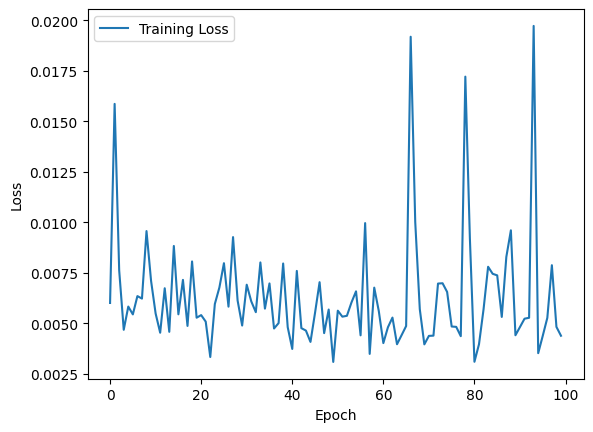

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

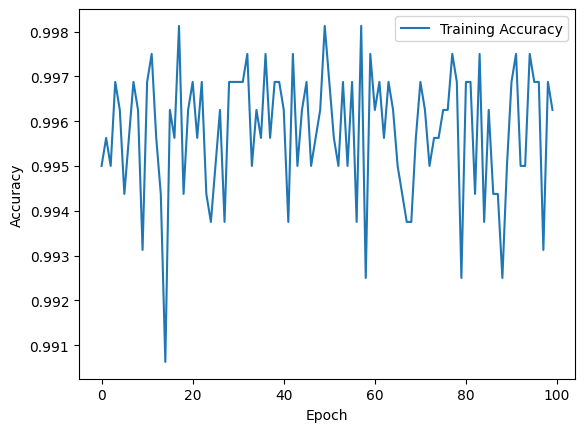

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

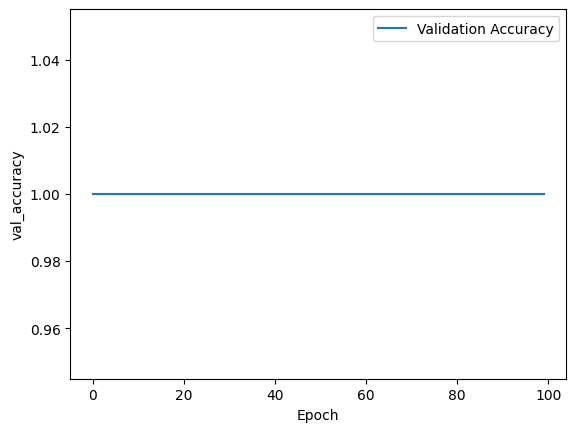

In [26]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show

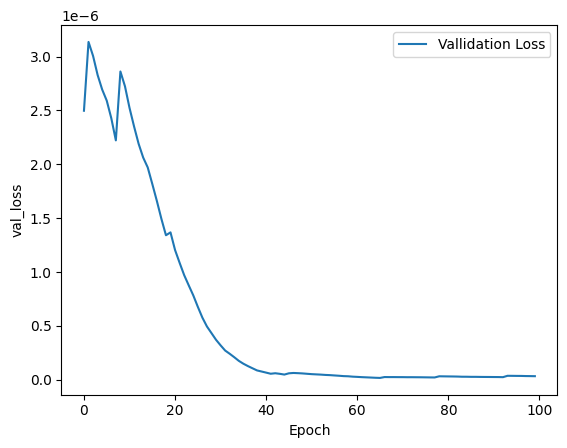

In [27]:
plt.plot(history.history['val_loss'], label='Vallidation Loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

In [ ]:
testX = ReadyInputData("/content/drive/MyDrive/SteganoData2/test/")
testY = model.predict(testX)
print(testY)

File msg0.jpg is Well Done!
1/1 [==============================] - 0s 20ms/step
[[0.79053074]]


In [ ]:
if round(testY[0][0]) == 1:
  print("스테고")
else:
  print("정상")

스테고


1
